In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

## Problem Statement

**The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.**

## Approach

**The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.**

In [29]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df.shape

(32561, 15)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

No null values in the data

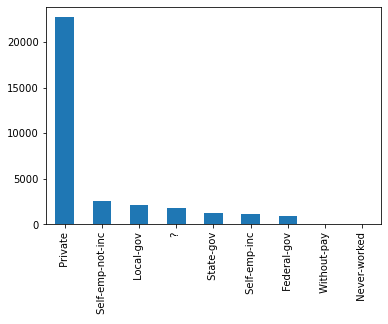

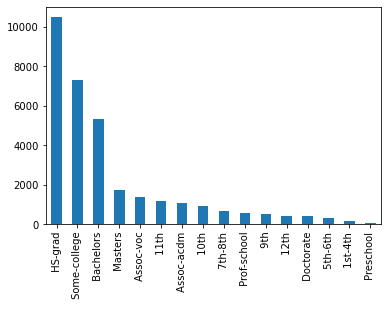

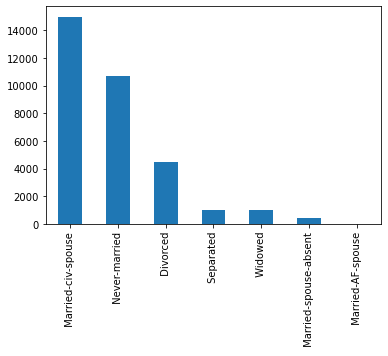

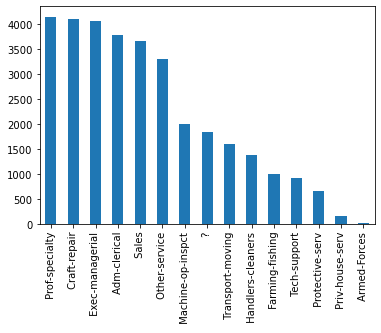

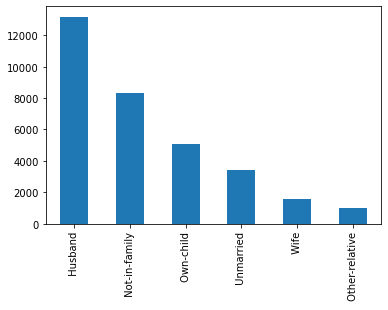

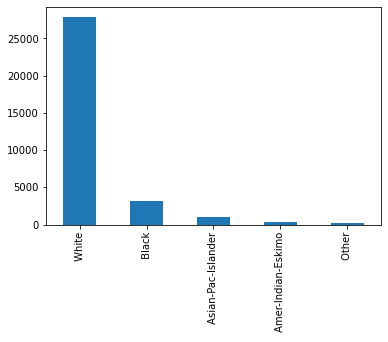

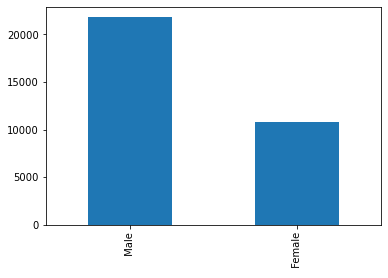

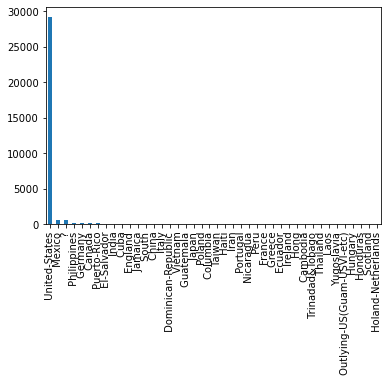

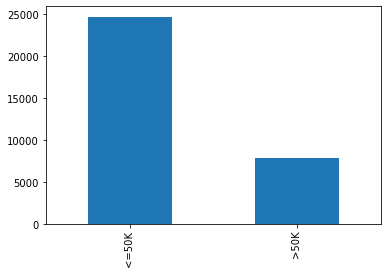

In [6]:
for i in df.select_dtypes(include='object').columns:
    df[i].value_counts().plot(kind='bar')
    plt.show()

Seems like our target columns is imbalanced.

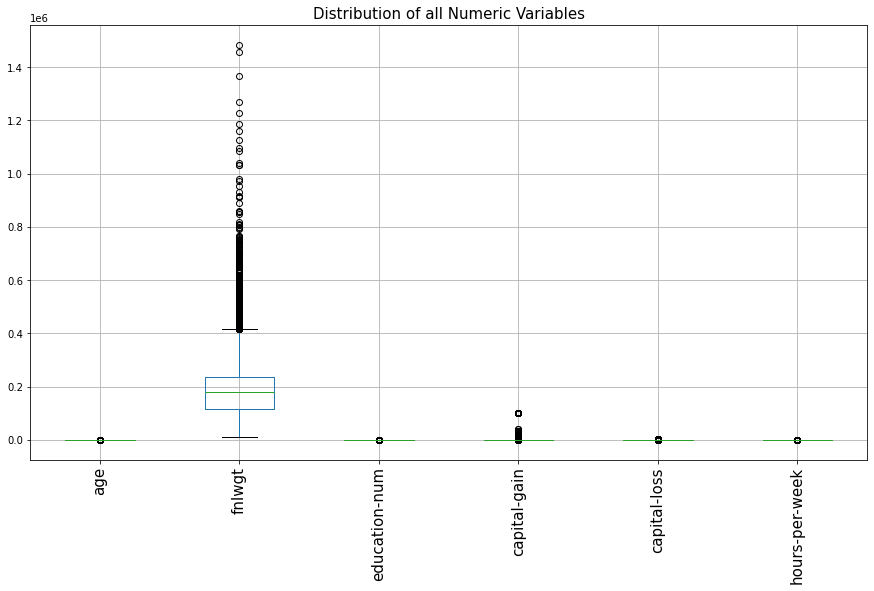

In [7]:
plt.figure(figsize = (15,8))

df.boxplot()

plt.title('Distribution of all Numeric Variables', fontsize = 15)

plt.xticks(rotation = 'vertical', fontsize = 15)

plt.show()

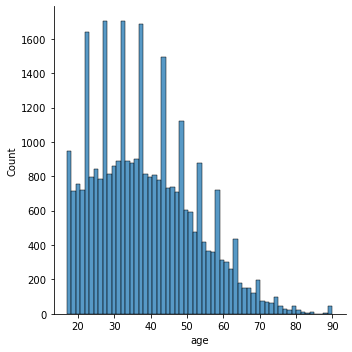

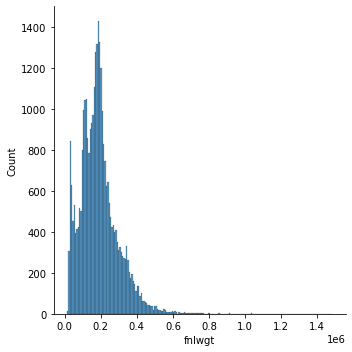

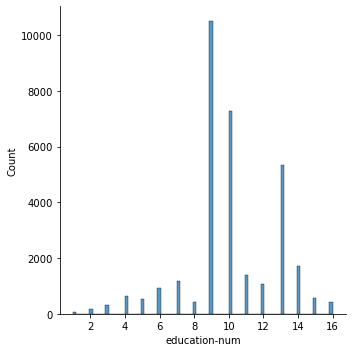

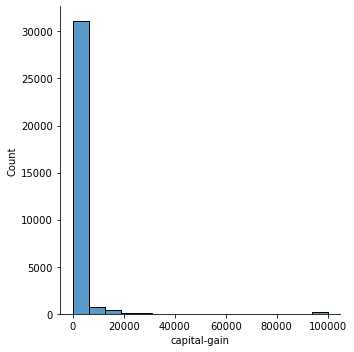

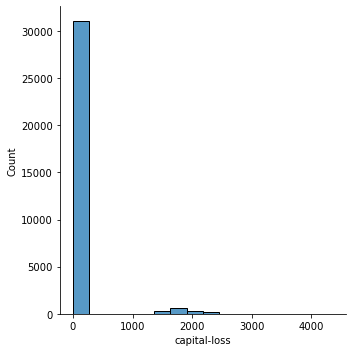

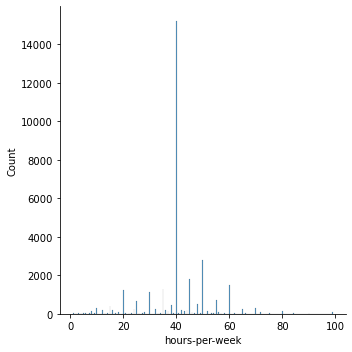

In [8]:
for i in df.select_dtypes(exclude='object').columns:
    sns.displot(df[i])
    plt.show()

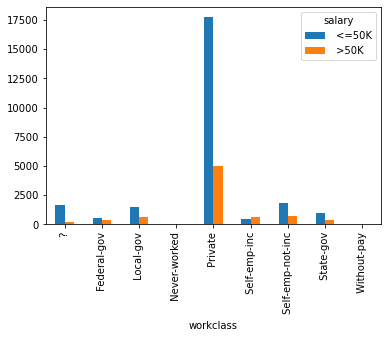

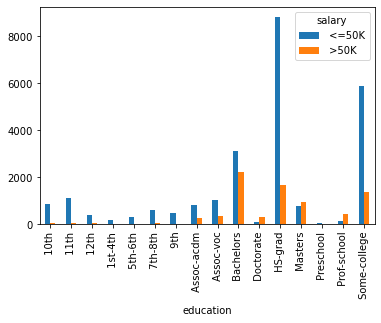

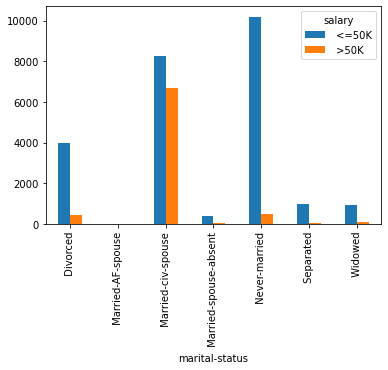

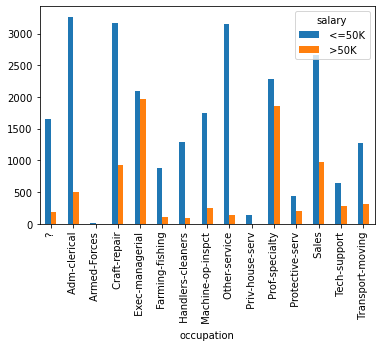

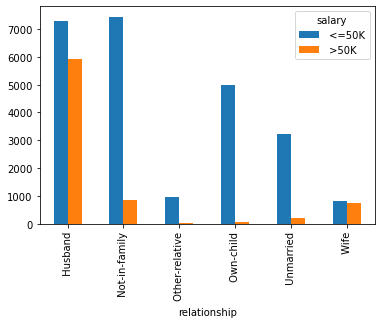

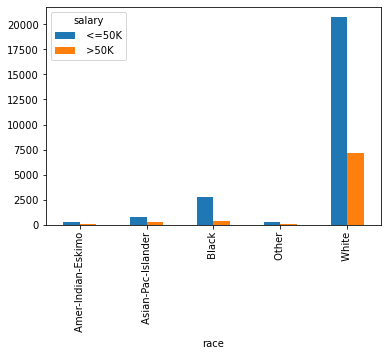

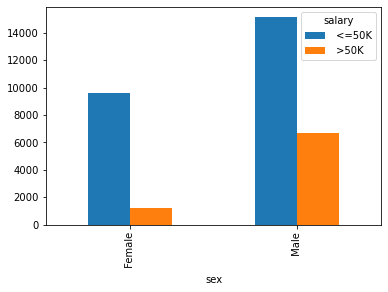

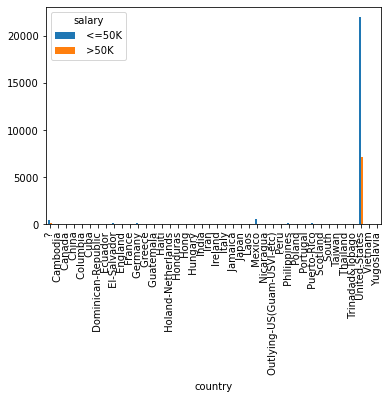

In [10]:
for i in df.drop('salary',axis=1).select_dtypes(include='object').columns:
    pd.crosstab(df[i],df.salary).plot(kind='bar')
    plt.show()

## Data Cleaning

**Applying oversampling**

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
os=RandomOverSampler(random_state=10)
X=df.drop("salary",axis=1)
y=df["salary"]
X,y=os.fit_resample(X,y)

In [13]:
from  collections import Counter
Counter(y)

Counter({' <=50K': 24720, ' >50K': 24720})

In [18]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [19]:
X.shape

(49440, 14)

In [20]:
y.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object

In [21]:
y.shape

(49440,)

In [23]:
df_ = pd.concat([X,y],axis=1)

In [24]:
df_.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
df_.shape

(49440, 15)

**We will handle the outliers when we scale the data**

## Feature Engineering

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df_.select_dtypes(include='object').columns:
    df_[i] = le.fit_transform(df_[i])

In [34]:
df_.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


#### Spliting the data

In [36]:
from sklearn.model_selection import train_test_split

X = df_.drop('salary',axis=1)
y = df_['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)


print('Xtrain shape', X_train.shape)
print('Xtest shape', X_test.shape)
print('ytrain shape', y_train.shape)
print('ytest shape', y_test.shape)

Xtrain shape (34608, 14)
Xtest shape (14832, 14)
ytrain shape (34608,)
ytest shape (14832,)


**Scaling the data on X_train and X_test to prevent data or information loss**

In [37]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [38]:
pt.fit(X_train)
x_train = pt.transform(X_train)
x_train = pd.DataFrame(x_train)
x_train.columns = X_train.columns
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,1.238924,-0.019368,1.079130,-1.079508,0.509431,-1.955813,0.160962,0.518562,0.382234,0.607577,-0.383189,-0.263443,2.698854,0.318965
1,-1.257606,-0.019368,-1.534736,-0.819489,0.108494,-0.271650,1.187475,1.547041,0.382234,-1.645882,-0.383189,-0.263443,-0.010495,0.318965
2,0.428411,-0.019368,0.263851,-0.819489,0.108494,-0.271650,-0.312103,-0.910425,0.382234,0.607577,-0.383189,-0.263443,2.289570,0.318965
3,0.980507,2.520025,-1.184995,0.062770,-0.653298,-0.271650,-0.846347,-0.910425,0.382234,0.607577,-0.383189,-0.263443,-0.175432,0.318965
4,0.847157,-1.901506,-0.767406,-1.079508,0.509431,-0.271650,1.374323,-0.910425,-2.624602,0.607577,-0.383189,-0.263443,-0.175432,0.318965


In [39]:
pt.fit(X_test)
x_test = pt.transform(X_test)
x_test = pd.DataFrame(x_test)
x_test.columns = X_test.columns
x_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.632965,-0.024902,0.572419,0.025400,-0.658765,-0.262905,1.550546,-0.904766,0.3859,0.608721,-0.383536,-0.266856,0.626690,0.315399
1,0.904671,-0.024902,0.314681,0.025400,-0.658765,-0.262905,1.550546,-0.904766,0.3859,0.608721,-0.383536,-0.266856,3.443117,0.315399
2,0.125053,2.442256,-0.727481,0.025400,-0.658765,1.155474,1.550546,0.522109,0.3859,-1.642788,2.608205,-0.266856,-0.184778,0.315399
3,-1.901405,-0.024902,0.237467,0.025400,-0.658765,1.155474,1.184974,1.277946,0.3859,-1.642788,-0.383536,-0.266856,-0.592060,0.315399
4,0.770343,-0.024902,-0.863777,-0.586768,0.915890,-0.262905,-0.560231,-0.904766,0.3859,0.608721,2.608239,-0.266856,-0.184778,0.315399


## Model Building

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, classification_report

In [42]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),XGBClassifier()]


for model in models:
    print(model)
    model = model.fit(x_train, y_train)
    print("Training Accuracy")
    print(model.score(x_train,y_train))
    print("Testing Accuracy")
    print(model.score(x_test,y_test))
    print('\n')

LogisticRegression()
Training Accuracy
0.7842406380027739
Testing Accuracy
0.7775080906148867


DecisionTreeClassifier()
Training Accuracy
0.9999711049468331
Testing Accuracy
0.8085221143473571


RandomForestClassifier()
Training Accuracy
0.9999133148404993
Testing Accuracy
0.8776294498381877


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[03:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_relea

In [52]:
model = RandomForestClassifier()
model = model.fit(x_train, y_train)
print("Training Accuracy")
print(model.score(x_train,y_train))
print("Testing Accuracy")
print(model.score(x_test,y_test))
predicted = model.predict(x_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))
print(f1_score(y_test,predicted,average=None))
print(recall_score(y_test,predicted,average='macro'))

Training Accuracy
0.9999422098936662
Testing Accuracy
0.8758090614886731
[[6469  931]
 [ 911 6521]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7400
           1       0.88      0.88      0.88      7432

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832

[0.87655827 0.8750671 ]
[0.87418919 0.87742196]
0.8758055741424955
[0.87537212 0.87624295]
0.8758055741424955


In [53]:
model.feature_importances_

array([0.15946922, 0.03523633, 0.14898159, 0.03612477, 0.08399887,
       0.1073712 , 0.06655665, 0.13511568, 0.01352242, 0.01841303,
       0.07788369, 0.01956503, 0.08211527, 0.01564624])